## 0. Project Planning

- goal is to learn as much as possible - this is my first time handling more complex data
- i want to combine regression and classification - regression will be your typical predicting the house sale price (which i’ll interpret as asking price - how much homes are selling for in the area). my prediction will be the predicted house’s market value - the difference between the value and the asking price is one measure of how good the deal is. i can then sort homes into underpriced, fairly priced, and overpriced. then, i can apply classification to determine whether a house has good flipping potential and is worth checking out based on factors like if it’s “underpriced”, has room for renovation, has high demand and/or low supply (if i can extract that from the data), and sales cycle length.

##### EVAL:
regression will be based simply on r2 and mean squared error.
in classification i can try to mess with slightly more complex evaluation (like confusion matrix, and precision and recall for the “high flipping potential” class).
RELEVANT METRICS:
anything that has an impact on sales price
factors that signal whether flipping potential is high or low - underpriced, fast sales cycle, supply demand mismatch (if absent, i can use houses sold in the same neighbourhood as a proxy for demand), renovation potential.

i have to be sure to explain assumptions and limitations of the dataset and why I do what I do - succinctly but clearly.

## 1. Importing Dataset & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('AmesHousing.csv')
pd.set_option("display.max_columns", None)   # allows you to see all columns
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Exploratory Data Analysis

- get an understanding of the data 
- get an idea of what to do with certain columns

In [3]:
from sklearn.model_selection import train_test_split

#train test split to avoid any learning from the test data
X = df.drop(['PID', 'Order', 'SalePrice'], axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)

- broad EDA

In [4]:
df.describe(include=object)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,1155,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,4,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,880,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
df.select_dtypes(include=int).describe()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,10147.921843,6.094881,5.563140,1971.356314,1984.266553,1159.557679,335.455973,4.676792,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,7880.017759,1.411026,1.111537,30.245361,20.860286,391.890885,428.395715,46.310510,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,876.250000,0.000000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,1084.000000,0.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,1384.000000,703.750000,0.000000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
df.select_dtypes(include=object).describe().T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


- vizualizing and transforming target variable

<Axes: xlabel='SalePrice', ylabel='Count'>

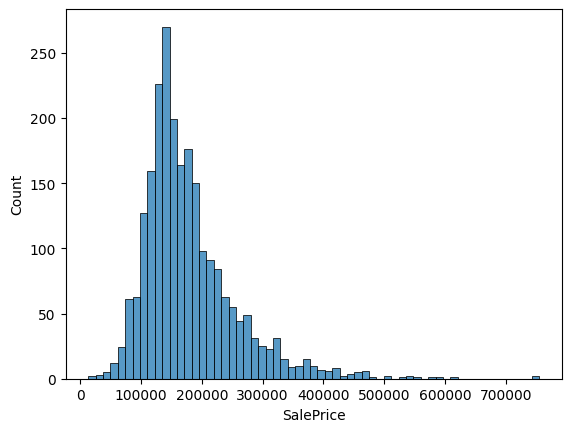

In [8]:
#vizualizing target (for the regression task)
sns.histplot(y_train)


In [9]:
#the target variable has a long right tail - we should log transform the data
df.describe()['SalePrice']

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
#log transforming it can increase model accuracy by making the effect of outliers proportional.
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

<Axes: xlabel='SalePrice', ylabel='Count'>

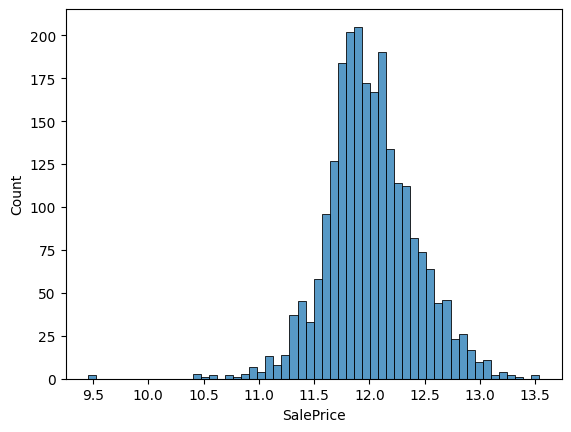

In [11]:
#a viz of the transformed target
sns.histplot(y_train_log)

In [12]:
y_train.sort_values(ascending=True)

181      12789
1553     13100
726      34900
2843     35000
2880     35311
         ...  
2450    584500
1637    591587
1063    615000
1760    745000
1767    755000
Name: SalePrice, Length: 2344, dtype: int64

In [13]:
#let's ensure all sales happened at around the same time so we don't have to adjust anything for inflation
df['Yr Sold'].value_counts()

Yr Sold
2007    694
2009    648
2006    625
2008    622
2010    341
Name: count, dtype: int64

we might have to compare only between houses sold in the same year - for example, 2008 was a year of massive crashes on the market. on the other hand though, a deal is a deal... if i don't factor it in it'll just mean that 2008 will have more good deals, which actually makes perfct sense. so i can leave it. although, maybe i should note in my final polished project that the classifier that detects houses with a high flipping potential assumes that you'll exist in similar market conditions to when the house was bought - a crash like the one in 2008 would melt your wallet.

In [14]:
#linear correlation of continuous variables with the target
df_train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)


SalePrice          1.000000
Overall Qual       0.795298
Gr Liv Area        0.698315
Garage Cars        0.644304
Garage Area        0.633106
Total Bsmt SF      0.612256
1st Flr SF         0.607433
Year Built         0.545409
Full Bath          0.542053
Year Remod/Add     0.517653
Garage Yr Blt      0.516211
Mas Vnr Area       0.490912
TotRms AbvGrd      0.475455
Fireplaces         0.467501
BsmtFin SF 1       0.423906
Wood Deck SF       0.333045
Lot Frontage       0.328726
Open Porch SF      0.297722
Bsmt Full Bath     0.286515
Half Bath          0.285369
2nd Flr SF         0.278977
Lot Area           0.261336
Bsmt Unf SF        0.163571
Bedroom AbvGr      0.149269
Screen Porch       0.136936
Pool Area          0.079020
3Ssn Porch         0.034845
Mo Sold            0.030714
BsmtFin SF 2       0.027205
Low Qual Fin SF   -0.016025
Misc Val          -0.017729
Bsmt Half Bath    -0.023675
Yr Sold           -0.037686
MS SubClass       -0.066351
Overall Cond      -0.104085
Kitchen AbvGr     -0

In [15]:
#let's also viz missing values
print(X_train.shape)
X_train.isna().sum().sort_values(ascending=False)

(2344, 79)


Pool QC           2332
Misc Feature      2250
Alley             2182
Fence             1874
Mas Vnr Type      1426
                  ... 
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Sale Condition       0
Length: 79, dtype: int64

## 3. Data Cleaning

### 3.1 Inspecting Missing Values

In [16]:
missing = X_train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(X_train)) * 100
types = X_train.dtypes
unique_vals = X_train.nunique()

summary = pd.concat([missing, missing_percent, types, unique_vals], axis=1)
summary.columns = ['Missing', 'Missing_%', 'Type', 'Unique_Values']
print(summary[summary['Missing'] > 0])

                Missing  Missing_%     Type  Unique_Values
Pool QC            2332  99.488055   object              4
Misc Feature       2250  95.989761   object              4
Alley              2182  93.088737   object              2
Fence              1874  79.948805   object              4
Mas Vnr Type       1426  60.836177   object              4
Fireplace Qu       1144  48.805461   object              5
Lot Frontage        393  16.766212  float64            120
Garage Yr Blt       122   5.204778  float64            102
Garage Qual         122   5.204778   object              5
Garage Cond         122   5.204778   object              5
Garage Finish       122   5.204778   object              3
Garage Type         120   5.119454   object              6
Bsmt Exposure        63   2.687713   object              4
BsmtFin Type 2       62   2.645051   object              6
BsmtFin Type 1       61   2.602389   object              6
Bsmt Cond            61   2.602389   object             

- choosing imputation strategy

In [17]:
#deciding on imputation strategy for each feature - performing vizualizations
#cateogricals to impute with "None": Pool QC, Misc Feature, Alley, Fence, Mas Vnr Type, Fireplace Qu, Garage Qual, Garage Cond, Garage Type, Garage Finish, Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual
#categoricals to impute with most common: 
#numericals to impute with 0: Lot Frontage, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Half Bath, Bsmt Full Bath, Garage Area, Garage Cars
#numericals to impute with median: 

#side-note: features like pool qc, misc feature, alley, fence, and mas vnr type, and something from garage may be worth feature engineering into a binary existence feature

- code used to come to the conclusions above

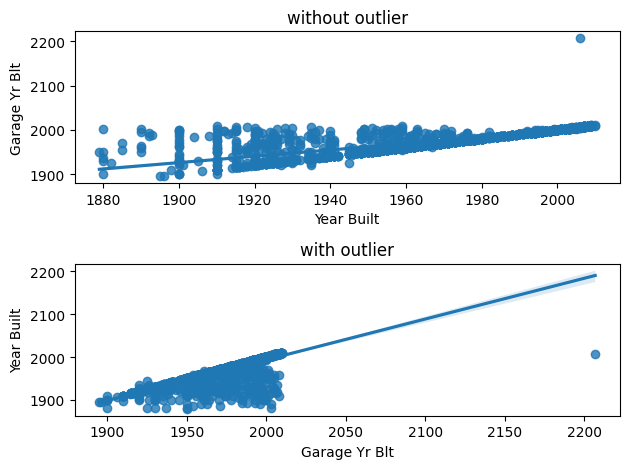

without outlier: 0.5162105956951499
with outlier 0.5162105956951499


In [18]:
#Garage Year Built, as a numerical, seems to have no smart way of imputing it - replacing with anything destroys the linear signal and correlation. 
#This same signal (of a missing garage) can be taken from any other garage related columns - the Garage Yr Blt feature will be dropped in the Data Pipeline
#df_train.head()

fig, axs = plt.subplots(2, 1)
sns.regplot(data=df_train, x='Year Built', y='Garage Yr Blt', ax=axs[0])
axs[0].set_title('without outlier')
sns.regplot(data=df_train, x='Garage Yr Blt', y='Year Built', ax=axs[1])
axs[1].set_title("with outlier")
plt.tight_layout()
plt.show()
print('without outlier:',df_train.corr(numeric_only=True)['Garage Yr Blt']['SalePrice'])
print('with outlier',df_train.corr(numeric_only=True)['Garage Yr Blt']['SalePrice'])

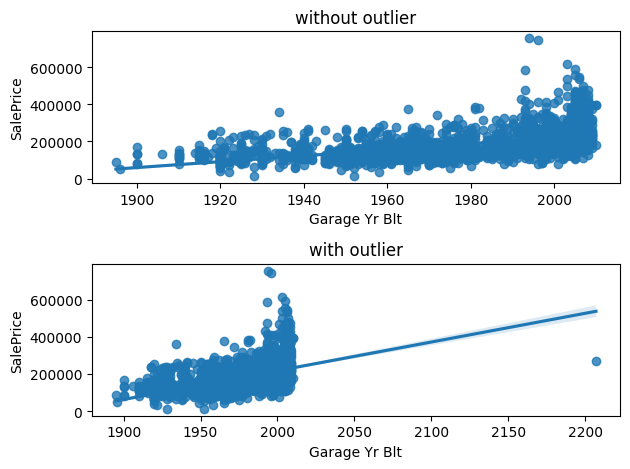

without outlier: 0.5213817724734765
with outlier 0.5162105956951499


In [19]:
#checking the impact of the incorrect entry in Garage Yr Blt (year 2207)

df_train_help = df_train[df_train['Garage Yr Blt'] <= 2010]
fig, axs = plt.subplots(2, 1)
sns.regplot(data=df_train_help, x='Garage Yr Blt', y='SalePrice', ax=axs[0])
axs[0].set_title('without outlier')
sns.regplot(data=df_train, x='Garage Yr Blt', y='SalePrice', ax=axs[1])
axs[1].set_title("with outlier")
plt.tight_layout()
plt.show()
print('without outlier:',df_train_help.corr(numeric_only=True)['Garage Yr Blt']['SalePrice'])
print('with outlier',df_train.corr(numeric_only=True)['Garage Yr Blt']['SalePrice'])

In [20]:
#pool quality is largely missing, let's see if it correlates with just not having a pool
print(len(df_train[df_train['Pool Area'] >= 1]))
#only 13 houses had a pool - that means that it must be those houses that have a reported pool quality. 
print(len(df_train[df_train['Pool QC'] != np.nan]))

12
2344


<Axes: xlabel='Pool QC', ylabel='SalePrice'>

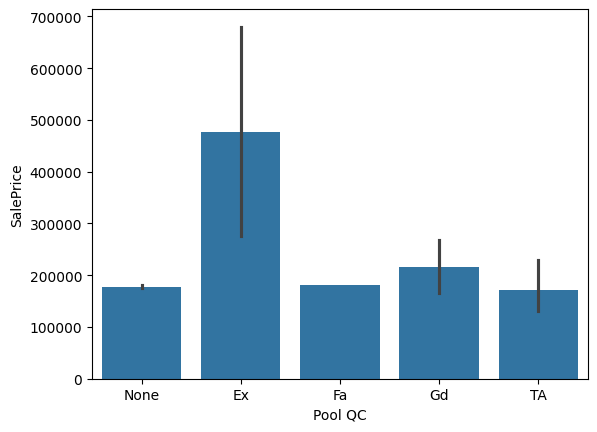

In [21]:
#pool quality appears to impact sales price
temp = df_train.copy()
temp['Pool QC'].fillna('None', inplace=True)
sns.barplot(data=temp, x='Pool QC', y='SalePrice')

In [22]:
#too little instances/data for generalization. 
temp['Pool QC'].value_counts()
#similar features will be collapsed into a binary existence feature

Pool QC
None    2332
Ex         4
Gd         4
TA         3
Fa         1
Name: count, dtype: int64

Mas Vnr Type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64


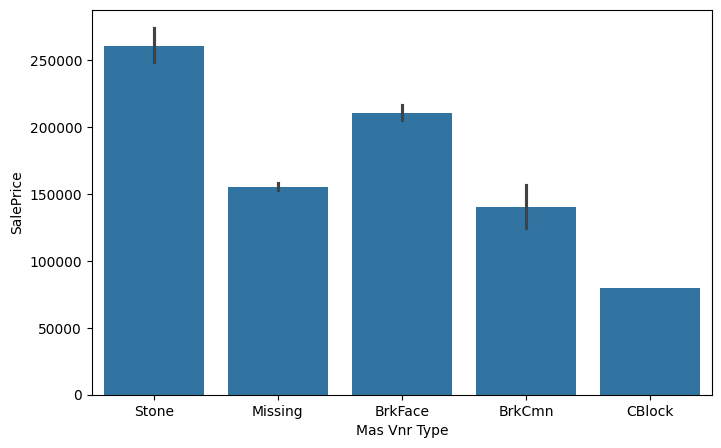

In [23]:
#masvnrtype?

tempor = df.copy()

tempor['Mas Vnr Type'] = tempor['Mas Vnr Type'].fillna('Missing')

# Now plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=tempor, 
    x='Mas Vnr Type', 
    y='SalePrice', 
)

print(df['Mas Vnr Type'].value_counts(dropna=False))

<Axes: xlabel='Yr Sold', ylabel='SalePrice'>

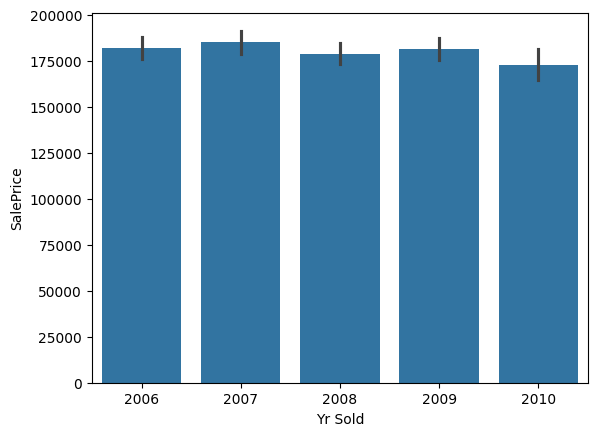

In [24]:
sns.barplot(data=df, x='Yr Sold', y='SalePrice', estimator='mean')

In [25]:
#checking how many rows are empty in all these fields at once.
df_train[df_train[['Garage Yr Blt', 'Garage Type', 'Garage Qual', 'Garage Cond', 'Garage Finish']].isna().all(axis=1)].shape
#so the 120 rows of missingness overlap - meaning these are simply houses without garages.


(120, 80)

In [26]:
#checking partial overlaps.
df_train[['Garage Yr Blt', 'Garage Type', 'Garage Qual', 'Garage Cond', 'Garage Finish']].isna().sum(axis=1).value_counts()

0    2222
5     120
4       2
Name: count, dtype: int64

In [27]:
#let's check the same thing with basements.
df[['Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']].isna().sum(axis=1).value_counts()

0    2846
5      80
1       4
Name: count, dtype: int64

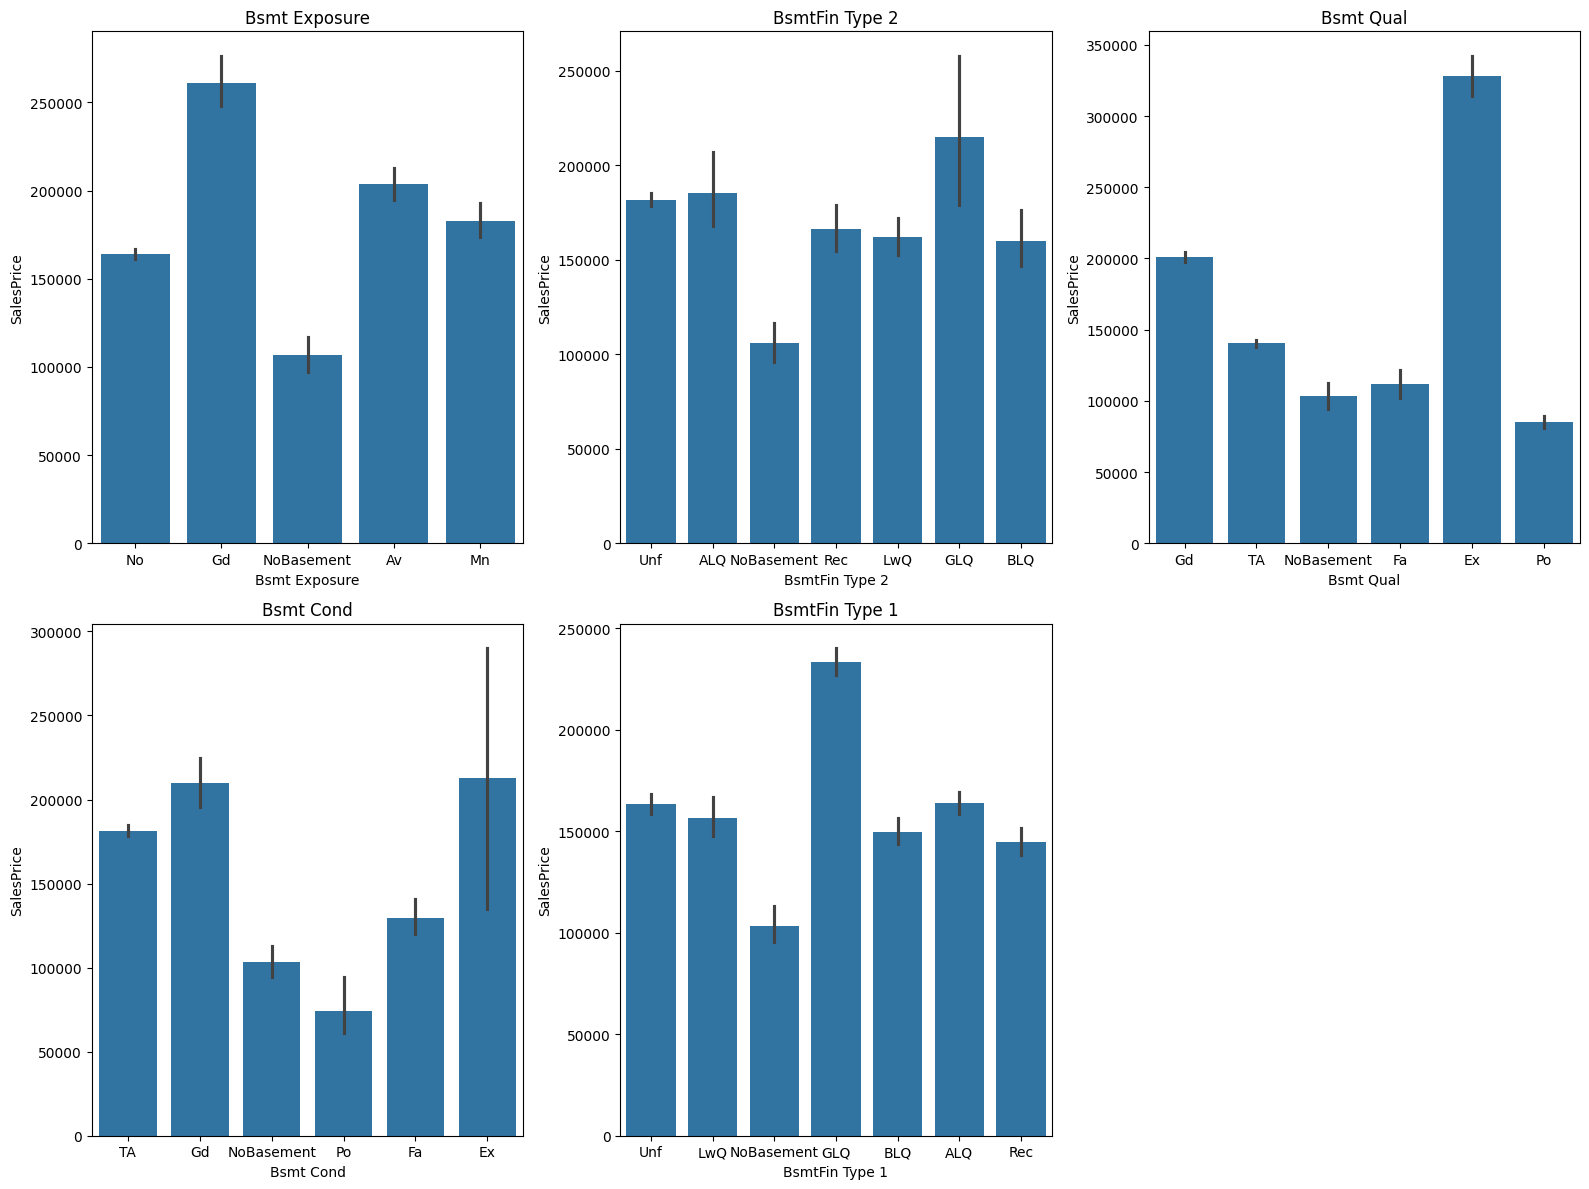

In [28]:
#let's vizualize the impact of various basement features on salepric

df_train_temp = df_train.copy()

bsmt_features = ['Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']

for feature in bsmt_features:
    df_train_temp[feature].fillna('NoBasement', inplace=True)

plt.figure(figsize=(16,12))
for i, item in enumerate(bsmt_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=df_train_temp, x=item, y='SalePrice')
    plt.title(f'{item}')
    plt.ylabel('SalesPrice')

plt.tight_layout()


### 3.2 Handling Missing Values - Pipeline??

- defining unique lists to be put into the data preprocessing pipeline

In [29]:
df_train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [30]:
df_train.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 80, dtype: object

In [31]:
#viewing all data types
for col in df_train.columns.tolist():
    if df[col].dtype == 'object':
        print(f"{col}")

pd.set_option('display.max_rows', 500)
#wrong: bsmt full and half bath.

MS Zoning
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin Type 2
Heating
Heating QC
Central Air
Electrical
Kitchen Qual
Functional
Fireplace Qu
Garage Type
Garage Finish
Garage Qual
Garage Cond
Paved Drive
Pool QC
Fence
Misc Feature
Sale Type
Sale Condition


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

#Different types of transforming we want to do:
#Numericals imputed with median
#Numericals imputed with 0
#Categoricals imputed with 0 and Ordinally Encoded
#Categoricals imputed with mode and ordianlly encoded
#Categoricals imputed with "missing" and one-hot encoded
#Categoricals imputed with mode and one-hot encoded
#Cateogricals Replaced with mode and Target Encoded

#high missingness features to be engineered into binary existence features should go into the one hot encoding set to fill with 
#Defining Separate lists to be transformed differently.

#Numerical Columns
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()
#Categorical columns
categorical_columns = X_train.select_dtypes(include='object').columns.tolist()

#print(df_train.shape[1])
#print(len(num_cols))
#print(len(categorical_columns))

#1. Numericals Imputed with median list
num_median = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd']

#2. numericals imputed with 0 list
num_zero = list(set(num_cols) - set(num_median))

#print(num_zero)
#print(num_zero)
print(X_train.shape)
print(len(num_cols))
print(len(categorical_columns))
print()
print(len(num_median))
print(len(num_zero))



['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
(2344, 79)
36
43

13
23


In [ ]:
#Categoricals To Be Ordinally Encoded: 
cat_ordinal = ['Utilities', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']

#3. Categorials to be Target Encoded
cat_target = ['Neighborhood', 'Exterior 1st', 'Exterior 2nd', 'Sale Type']
df_train[categorical_columns].nunique().sort_values(ascending=False)

Neighborhood      28
Exterior 1st      16
Exterior 2nd      16
Sale Type         10
Condition 1        9
Functional         8
Condition 2        8
House Style        8
Roof Matl          8
MS Zoning          7
Garage Type        6
Heating            6
BsmtFin Type 2     6
BsmtFin Type 1     6
Foundation         6
Sale Condition     6
Roof Style         6
Lot Config         5
Garage Cond        5
Garage Qual        5
Fireplace Qu       5
Heating QC         5
Electrical         5
Bsmt Qual          5
Bldg Type          5
Bsmt Cond          5
Exter Cond         5
Misc Feature       4
Fence              4
Pool QC            4
Exter Qual         4
Bsmt Exposure      4
Land Contour       4
Kitchen Qual       4
Mas Vnr Type       4
Lot Shape          4
Land Slope         3
Garage Finish      3
Paved Drive        3
Utilities          3
Central Air        2
Street             2
Alley              2
dtype: int64

In [ ]:
#Columns to be one hot encoded (nominal)
cat_onehot = list(set(categorical_columns) - set(cat_ordinal) - set(cat_target))

print(len(categorical_columns))
print(len(cat_onehot))
print(len(cat_ordinal))
print(len(cat_target))

print(categorical_columns)
print()
print('nominal:',sorted(cat_onehot))
print('ordinal',sorted(cat_ordinal))
print('target:',sorted(cat_target))

43
25
14
4
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

nominal: ['Alley', 'Bldg Type', 'Central Air', 'Condition 1', 'Condition 2', 'Electrical', 'Fence', 'Foundation', 'Garage Finish', 'Garage Type', 'Heating', 'House Style', 'Land Contour', 'Land Slope', 'Lot Config', 'Lot Shape', 'MS Zoning', 'Mas Vnr Type', 'Misc Feature', 'Paved Drive', 'Pool QC', 'Roof Matl', 'Roof Style', 'Sale Condition', 'Street']
ordinal ['Bsmt C

In [ ]:
#4. Nominal columns to be imputed with "Missing":
cat_onehot_missing = ['Pool QC', 'Misc Feature', 'Alley', 'Garage Finish', 'Garage Type', 'Fence', 'Mas Vnr Type']
#5. Nominal columns to be imputed with mode
cat_onehot_mode = list(set(cat_onehot) - set(cat_onehot_missing))

print(len(cat_onehot))
print(len(cat_onehot_missing))
print(len(cat_onehot_mode))

25
7
18


In [ ]:
#6. Ordinal columns to be imputed with "Missing" (signaling that the feature is missing): Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Fireplace Qu, Garage Qual, Garage Cond
cat_ordinal_missing = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']

#7. Ordinal columns to be imputed with mode: 
cat_ordinal_mode = list(set(cat_ordinal) - set(cat_ordinal_missing))

print(len(cat_ordinal))
print(len(cat_ordinal_missing))
print(len(cat_ordinal_mode))

14
8
6


In [103]:
#We now have 7 lists to be imputed and encoded in different ways. 
print("num_median:", len(num_median), num_median)
print("num_zero:", len(num_zero), num_zero)
print("cat_onehot_mode:", len(cat_onehot_mode), cat_onehot_mode)
print("cat_onehot_missing:", len(cat_onehot_missing), cat_onehot_missing)
print("cat_ordinal_mode:", len(cat_ordinal_mode), cat_ordinal_mode)
print("cat_ordinal_missing:", len(cat_ordinal_missing), cat_ordinal_missing)
print("cat_target:", len(cat_target), cat_target)

num_median: 13 ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd']
num_zero: 23 ['Fireplaces', 'Lot Area', 'MS SubClass', 'Bsmt Full Bath', 'Total Bsmt SF', 'Screen Porch', 'Mo Sold', 'Pool Area', 'Wood Deck SF', 'Garage Cars', 'Misc Val', 'Bsmt Unf SF', 'Enclosed Porch', 'BsmtFin SF 2', 'BsmtFin SF 1', 'Bsmt Half Bath', 'Open Porch SF', '3Ssn Porch', 'Yr Sold', 'Lot Frontage', 'Low Qual Fin SF', 'Garage Area', 'Mas Vnr Area']
cat_onehot_mode: 18 ['Heating', 'Condition 1', 'Electrical', 'Land Slope', 'Street', 'Foundation', 'Condition 2', 'Central Air', 'Roof Matl', 'Lot Shape', 'Sale Condition', 'Bldg Type', 'MS Zoning', 'Paved Drive', 'Land Contour', 'House Style', 'Lot Config', 'Roof Style']
cat_onehot_missing: 7 ['Pool QC', 'Misc Feature', 'Alley', 'Garage Finish', 'Garage Type', 'Fence', 'Mas Vnr Type']
cat_ordinal_mode: 6 ['Utilitie

In [ ]:
#Let's build a pipeline to handle this logic:

# 1. num_median: Impute with median, then scale
num_median_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 2. num_zero: Impute with 0, then scale
num_zero_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# 3. cat_onehot_mode: Impute with mode, then OneHotEncode
cat_onehot_mode_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 4. cat_onehot_missing: Impute with constant 'Missing', then OneHotEncode
cat_onehot_missing_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 5. cat_ordinal_mode: Impute with mode, then OrdinalEncode
cat_ordinal_mode_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('oe', OrdinalEncoder(
        categories=NEED TO SPECIFY,
        handle_unknown='use_encoded_value',
        unknown_value=-1 # Assign -1 to unknown categories
    ))
])

# 6. cat_ordinal_missing: Impute with constant 'NoFeature', then OrdinalEncode
cat_ordinal_missing_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=MISSING_PLACEHOLDER)),
    ('oe', OrdinalEncoder(
        categories=NEED TO SPECIFY,
        handle_unknown='use_encoded_value',
        unknown_value=-1 # Assign -1 to unknown categories
    ))
])

# 7. cat_target: TargetEncode (no imputer needed, it handles missing)
# This encoder needs 'y' (the target) during fit.
# Assumes 'y' is continuous (e.g., SalePrice). For classification, use target_type='auto'
cat_target_pipe = TargetEncoder(
    handle_unknown='value',
    handle_missing='value'
)


# --- 4. Combine All Pipelines in ColumnTransformer ---

preprocessor = ColumnTransformer(
    transformers=[
        # (name, pipeline_object, feature_list)
        ('num_median', num_median_pipe, num_median),
        ('num_zero', num_zero_pipe, num_zero),
        ('cat_ohe_mode', cat_onehot_mode_pipe, cat_onehot),
        ('cat_ohe_miss', cat_onehot_missing_pipe, cat_onehot_missing),
        ('cat_ord_mode', cat_ordinal_mode_pipe, cat_ordinal_mode),
        ('cat_ord_miss', cat_ordinal_missing_pipe, cat_ordinal_missing),
        ('cat_target', cat_target_pipe, cat_target)
    ],
    remainder='passthrough' # Keep any columns not specified
)

### 3.3 Baseline Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

y = df['SalePrice']

y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

mean = y_train.mean()
y_pred = [mean] * len(y_test)
print(len(y_pred))

r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Baseline model r2:', r2)
print('Baseline model root mean squared error', rmse)

586
Baseline model r2: -0.015282546687198861
Baseline model root mean squared error 90222.37239996913


### 3.4 Handling Outliers

In [44]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [45]:
#splitting into X and y
X = df.drop(['SalePrice'], axis=1)
print(X.shape)

y = df['SalePrice']

(2930, 81)


In [46]:
#checking unique data types present in our dataset
print(X.dtypes.nunique())
print(X.dtypes.unique())

3
[dtype('int64') dtype('O') dtype('float64')]


In [47]:
#let's ensure each feature is of the correct data type (no numerical columns are classified as objects amd vice versa)
X.select_dtypes(include=[object]).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [48]:
X['Fireplaces'].value_counts()

#sns.regplot(data=df, x='Low Qual Fin SF', y='SalePrice')
#df['Mas Vnr Area'].corr(df['SalePrice'])
#categorical to numeric NONE
#numeric to categorical: Ms SubClass, 

Fireplaces
0    1422
1    1274
2     221
3      12
4       1
Name: count, dtype: int64

In [49]:
#let's ensure each feature is of the correct data type (no numerical columns are classified as objects and vice versa)
X.select_dtypes(exclude=[object]).columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

<Axes: xlabel='Misc Val', ylabel='SalePrice'>

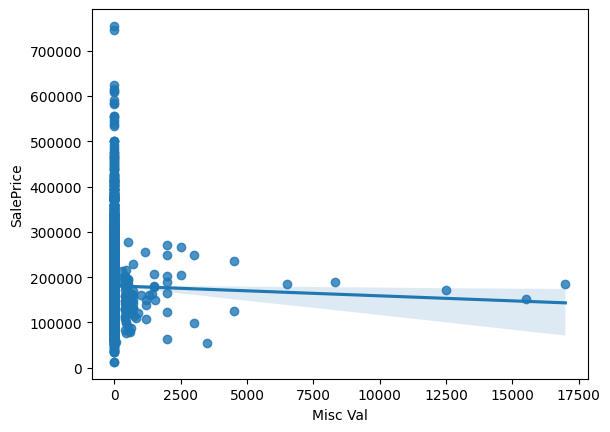

In [50]:
sns.regplot(x='Misc Val', y='SalePrice', data=df)

In [51]:
#identifying categorical vs numerical features
categorical_df = X.select_dtypes(include=[object])
categorical_columns = X.select_dtypes(include=[object]).columns
numerical_df = X.select_dtypes(exclude=[object])
numerical_columns = X.select_dtypes(exclude=[object]).columns

print(X.shape)
print(categorical_df.shape)
print(numerical_df.shape)

(2930, 81)
(2930, 43)
(2930, 38)


In [52]:
#let's begin with preprocessing the categoricals
categorical_columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [53]:
#let's check quantity of unique values.
X[categorical_columns].nunique().sort_values(ascending=False)

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
Functional         8
Condition 2        8
House Style        8
Roof Matl          8
MS Zoning          7
Garage Type        6
Fireplace Qu       6
Heating            6
BsmtFin Type 2     6
BsmtFin Type 1     6
Foundation         6
Sale Condition     6
Roof Style         6
Kitchen Qual       5
Lot Config         5
Misc Feature       5
Garage Cond        5
Garage Qual        5
Electrical         5
Heating QC         5
Bsmt Qual          5
Exter Cond         5
Bldg Type          5
Bsmt Cond          5
Mas Vnr Type       4
Bsmt Exposure      4
Exter Qual         4
Fence              4
Land Contour       4
Lot Shape          4
Pool QC            4
Paved Drive        3
Land Slope         3
Utilities          3
Garage Finish      3
Street             2
Central Air        2
Alley              2
dtype: int64

In [54]:
#for the ones with many unique values, target encoding will be needed.
#i must go through each and decide how it should be encoded:
#many unique values? - target encoding. ordinal? - label encoding. nominal? - dummies.


In [55]:
#to decrease dimensionality, it's best to target encode features with 10+ unique values.
#let's ensure each unique value has enough instances for geenralizability.
#starting with Neighborhood
X['Neighborhood'].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [56]:
#for target encoding we'll be computing the mean SalePrice for each neighborhood. To avoid overfitting, let's merge categories with less than 30 instances in an "Other" category.
counts = X['Neighborhood'].value_counts()
rare_labels = counts[counts < 30].index.tolist()

X['Neighborhood'].replace(rare_labels, 'Other', inplace=True)

X['Neighborhood'].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
Other       96
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Name: count, dtype: int64

In [57]:
#lets check Exterior 1st. since there's a long tail, let's merge all values with less than 100 instances (a 3% threshold)
df['Exterior 1st'].value_counts(normalize=True)

Exterior 1st
VinylSd    0.350171
MetalSd    0.153584
HdBoard    0.150853
Wd Sdng    0.143345
Plywood    0.075427
CemntBd    0.043003
BrkFace    0.030034
WdShing    0.019113
AsbShng    0.015017
Stucco     0.014676
BrkComm    0.002048
AsphShn    0.000683
CBlock     0.000683
Stone      0.000683
PreCast    0.000341
ImStucc    0.000341
Name: proportion, dtype: float64

In [58]:
#merging Exterior 1st
counts = df['Exterior 1st'].value_counts()
rare_labels = counts[counts < 100].index
rare_labels.to_list()

df['Exterior 1st'].replace(rare_labels, 'Other', inplace=True)

df['Exterior 1st'].value_counts()

Exterior 1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Other       245
Plywood     221
CemntBd     126
Name: count, dtype: int64

In [59]:
#checking Exterior 2nd
df['Exterior 2nd'].value_counts()

Exterior 2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: count, dtype: int64

In [60]:
#merging. let's set threshold to 40
counts = df['Exterior 2nd'].value_counts()
rare_labels = counts[counts < 40].index
rare_labels.to_list()

df['Exterior 2nd'].replace(rare_labels, 'Other', inplace=True)

df['Exterior 2nd'].value_counts()

Exterior 2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Other        90
Wd Shng      81
BrkFace      47
Stucco       47
Name: count, dtype: int64

In [61]:
#and lastly Sale Type
df['Sale Type'].value_counts()

Sale Type
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

In [62]:
#let's merge the instances under 30
counts = df['Sale Type'].value_counts()
rare_labels = counts[counts < 30].index
rare_labels.to_list()

df['Sale Type'].replace(rare_labels, 'Other', inplace=True)

df['Sale Type'].value_counts()

Sale Type
WD       2536
New       239
COD        87
Other      68
Name: count, dtype: int64

In [63]:
#let's target encode these columns - I NEED TO TRAIN/TEST SPLIT FIRST!!
